In [ ]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
-  -
"""

In [1]:
import numpy as np
import os

# Graphic tools
import matplotlib.pyplot as plt
import matplotlib

font_params = {'size' : 14}
matplotlib.rc('font', **font_params)

# Shapes, patches and color managment
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter

from matplotlib.path import Path
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d

# -- Our tools --
from simulations.utils.tools_basic import createDir
from simulations.utils.tools_math import *

# Create the output directory
OUTPUT_FOLDER = os.path.join("output")
createDir(OUTPUT_FOLDER)

The directory 'output' already exists!


# Fig 1. Earth and body fixed reference frames

In [2]:
"""
- Unicycle patch -
"""
def unicycle_patch(XY, yaw, color, size=1, lw=0.5):
    Rot = np.array([[np.cos(yaw), np.sin(yaw)],[-np.sin(yaw), np.cos(yaw)]])

    apex = 45*np.pi/180 # 30 degrees apex angle
    b = np.sqrt(1) / np.sin(apex)
    a = b*np.sin(apex/2)
    h = b*np.cos(apex/2)

    z1 = size*np.array([a/2, -h*0.3])
    z2 = size*np.array([-a/2, -h*0.3])
    z3 = size*np.array([0, h*0.6])

    z1 = Rot.dot(z1)
    z2 = Rot.dot(z2)
    z3 = Rot.dot(z3)

    verts = [(XY[0]+z1[1], XY[1]+z1[0]), \
             (XY[0]+z2[1], XY[1]+z2[0]), \
             (XY[0]+z3[1], XY[1]+z3[0]), \
             (0, 0)]

    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(verts, codes)

    return patches.PathPatch(path, fc=color, lw=lw)

In [3]:
class figure_1:
    def __init__(self) -> None:
        self.ax_cols = ["r","g","b"]

    """\
    - Figure init -
    """
    def fig_init(self, figsize=(8,8), lim=5, view=(25,-50), dpi=100):
        # Figure init
        fig = plt.figure(figsize=figsize, dpi=dpi)
        grid = plt.GridSpec(1, 1, hspace=0, wspace=0)
        main_ax = fig.add_subplot(grid[:, 0], projection='3d')

        # Title and axes labels
        # main_ax.set_title("", fontsize=14)
        # main_ax.set_xlabel(r"x")
        # main_ax.set_ylabel(r"y")
        # main_ax.set_zlabel(r"z")

        # Fix the limits
        main_ax.set_xlim([0.1,lim])
        main_ax.set_ylim([0.1,lim])
        main_ax.set_zlim([0.1,lim])

        # 3D view and 3D projection type
        main_ax.view_init(*view)
        main_ax.set_proj_type('ortho')

        # Hide ticks
        # main_ax.set_xticks([])
        # main_ax.set_yticks([])
        # main_ax.set_zticks([])

        # Transparent spines
        # main_ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        # main_ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        # main_ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        #main_ax.grid(False)
        main_ax.axis("off")

        # Draw the "xy" plane
        c_plane = colorConverter.to_rgba('gray', alpha=0.15)
        verts = [5*np.array([(0,0), (0,1), (1,1), (1,0), (0,0)])]

        poly = PolyCollection(verts, facecolors=c_plane, edgecolor="k", lw=0.4)
        main_ax.add_collection3d(poly, zs=[0], zdir='z')

        self.fig = fig
        self.grid = grid
        self.main_ax = main_ax

    """\
    - Funtion to visualize the position and orientation of a reference frame -
    """
    def plot_frame(self, p, R, color=["k","k","k"], arr_len = 1.5, lw=1.2):
        ax = self.main_ax

        # Draw the frame axes
        for i in range(3):
            ax.quiver(p[0], p[1], p[2], R[i,0], R[i,1], R[i,2],
                      color=color[i], length=arr_len, 
                      normalize=True, alpha=1, arrow_length_ratio=0.2, lw=lw)
            
    """\
    - Funtion to plot vectors -
    """
    def plot_vec(self, p0, pf, color = "k", ls = "-", lw = 1.5, rt = 0.05):
        ax = self.main_ax

        # Compute the vector lenght
        p0, pf = np.array(p0), np.array(pf)
        vec_len = np.linalg.norm(pf - p0)

        # Draw the quiver
        ax.quiver(p0[0], p0[1], p0[2], pf[0]-p0[0], pf[1]-p0[1], pf[2]-p0[2],
                  color=color, length=vec_len, zorder=3,
                  normalize=True, alpha=1, arrow_length_ratio=rt, ls=ls, lw=lw)
    
    def plot_body(self, p, phi):
        icon = unicycle_patch([p[0], p[1]], phi, "k")
        icon.set_alpha(0.3)

        icon_shadow = unicycle_patch([p[0], p[1]], phi, "k")
        icon_shadow.set_alpha(0.15)
        
        self.main_ax.add_patch(icon)
        self.main_ax.add_patch(icon_shadow)
        art3d.pathpatch_2d_to_3d(icon, z=p[2], zdir="z")
        art3d.pathpatch_2d_to_3d(icon_shadow, z=0, zdir="z")

    def plot_text(self, p, label, zdir=None, c="k"):
        self.main_ax.text(p[0], p[1], p[2], label, zdir, color=c)


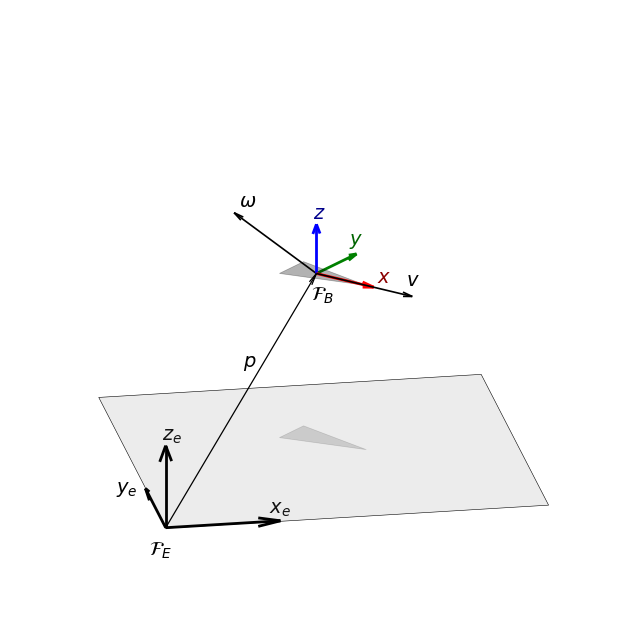

In [13]:
# ---------- PARAMETERS

pe = np.array([0,0,0])
pb = np.array([2.5,3,3])

Re = np.eye(3)
Rb = rot_3d_matrix(np.pi/4, 0, 0)
Rw = rot_3d_matrix(-3*np.pi/4, np.pi/6, 0)

# ----------

# Init the figure frame
fig_frame = figure_1()
fig_frame.fig_init(view=(20,-100), dpi=100)

# Plot the reference frames axes and object
fig_frame.plot_frame(pe, Re, arr_len = 1.5, lw=2)
fig_frame.plot_frame(pb, Rb, arr_len = 0.9, color = ["r","g","b"], lw=2)
fig_frame.plot_body(pb, -np.pi/4)

# Plot vectors
fig_frame.plot_vec(pe, pb, ls="-", lw=0.9, rt=0.04)
fig_frame.plot_vec(pb, pb + 1.5*Rb[0,:], ls="-", lw=1.2, rt=0.1)
fig_frame.plot_vec(pb, pb + 1.5*Rw[0,:], ls="-", lw=1.2, rt=0.1)

# Plot notation labels
fig_frame.plot_text([-0.4,-1,0]  , r"$\mathcal{F}_E$")
fig_frame.plot_text([1.4,0.3,0]  , r"$ x_e$")
fig_frame.plot_text([-0.4,1.4,0] , r"$ y_e$")
fig_frame.plot_text([-0.05,0,1.6], r"$ z_e$")

fig_frame.plot_text(pb + np.array([-0.25,-1,0])  , r"$\mathcal{F}_B$")
fig_frame.plot_text(pb + np.array([0.7,-0.5,0])  , r"$ x$", c="darkred")
fig_frame.plot_text(pb + np.array([0.6,1,0])     , r"$ y$", c="darkgreen")
fig_frame.plot_text(pb + np.array([-0.05,0,1])   , r"$ z$", c="darkblue")

fig_frame.plot_text(pb/1.6 + np.array([-0.2,0.1,0]), r"$p$")
fig_frame.plot_text(pb + np.array([1.05,-0.68,0]) , r"$v$")
fig_frame.plot_text(pb + 1.5*Rw[0,:] + np.array([0.1,0.2,0]) , r"$\omega$")

#fig_frame.fig.savefig(os.path.join(OUTPUT_FOLDER, "fig_1.png"))

# Fig 2. Geodesics in $T^2$ and $S^2$

In [145]:
def int_t2_geodesic(ang_0, ang_dot, delta_t, R=2, r=1):
    theta0, phi0 = ang_0[0], ang_0[1]
    theta_dot, phi_dot = ang_dot[0], ang_dot[1]

    t = np.linspace(0, delta_t, 200)
    xg = (R + r*np.cos(theta0 + theta_dot*t)) * np.cos(phi0 + phi_dot*t)
    yg = (R + r*np.cos(theta0 + theta_dot*t)) * np.sin(phi0 + phi_dot*t)
    zg = r * np.sin(theta0 + theta_dot*t)

    return [xg, yg, zg]

def plot_curve(ax, curve_pts, color="red"):
    ax.plot(curve_pts[0], curve_pts[1], curve_pts[2], c=color, zorder=10, alpha=0.6)

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Parameters ##
R = 2  # Major radius
r = 1  # Minor radius

## Torus surface equations ##
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
theta, phi = np.meshgrid(theta, phi)
x = (R + r*np.cos(theta)) * np.cos(phi)
y = (R + r*np.cos(theta)) * np.sin(phi)
z = r * np.sin(theta)

## Generate a torus geodesic
theta0, phi0 = np.pi/2, 0
ang_0 = [theta0, phi0]

# Minimum length
theta_dot, phi_dot = 0.04, 0
ang_dot = [theta_dot, phi_dot]
gamma1 = int_t2_geodesic(ang_0, ang_dot, 20)

# Other geodesics
theta_dot, phi_dot = 0.04, -np.pi/10
ang_dot = [theta_dot, phi_dot]
gamma2 = int_t2_geodesic(ang_0, ang_dot, 20)

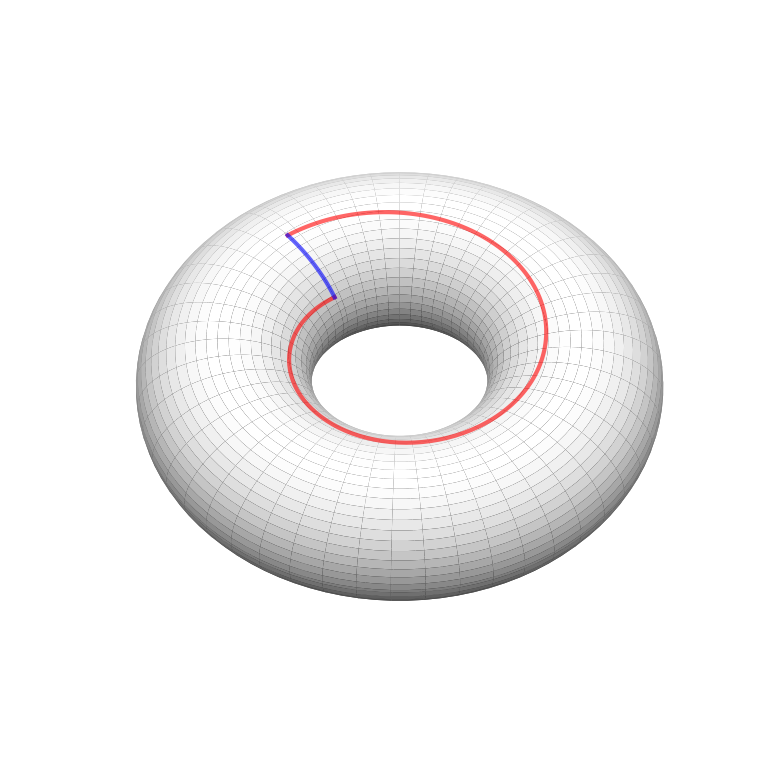

In [147]:
## Figure generation ##
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()

# Set elevation and azimuth angles
ax.view_init(elev=50, azim=140)  

# Set equal limits for all axes
ax.set_xlim([-1.3*R, 1.3*R])
ax.set_ylim([-1.3*R, 1.3*R])
ax.set_zlim([-1.3*R, 1.3*R])

## T^2
# Plot the torus
ax.plot_surface(x, y, z, cmap='gray', alpha=1)

# Plot the geodesics
plot_curve(ax, gamma1)
plot_curve(ax, gamma2, "blue")

## S^2

#fig_frame.fig.savefig(os.path.join(OUTPUT_FOLDER, "fig_2.png"))
plt.show()